In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns


In [2]:
df=pd.read_csv("cropdata.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,NaN,NaN,NaN,34.567890,57.402477,NaN,NaN,pomegranate
1,NaN,25.445813,NaN,NaN,57.402477,NaN,NaN,pomegranate
2,NaN,NaN,6.497367,NaN,57.402477,NaN,NaN,pomegranate
3,NaN,NaN,NaN,NaN,57.402477,NaN,109.416919,pomegranate
4,2.0,24.000000,38.000000,24.559816,91.635362,5.922936,111.968462,pomegranate
...,...,...,...,...,...,...,...,...
2703,42.0,59.000000,55.000000,40.102077,94.351102,6.979102,149.119999,papaya
2704,43.0,64.000000,47.000000,38.589545,91.580765,6.825665,102.270823,papaya
2705,35.0,67.000000,49.000000,41.313301,91.150880,6.617067,239.742755,papaya
2706,56.0,59.000000,55.000000,37.035519,91.794302,6.551893,188.518142,papaya


In [24]:
df=pd.read_csv("cropdata.csv")
print(df.to_string())

          N           P           K  temperature   humidity        ph    rainfall        label
0       NaN         NaN         NaN    34.567890  57.402477       NaN         NaN  pomegranate
1       NaN   25.445813         NaN          NaN  57.402477       NaN         NaN  pomegranate
2       NaN         NaN    6.497367          NaN  57.402477       NaN         NaN  pomegranate
3       NaN         NaN         NaN          NaN  57.402477       NaN  109.416919  pomegranate
4       2.0   24.000000   38.000000    24.559816  91.635362  5.922936  111.968462  pomegranate
5       6.0   18.000000   37.000000    19.656901  89.937010  5.937650  108.045893  pomegranate
6       8.0   26.000000   36.000000    18.783596  87.402477  6.804781  102.518476  pomegranate
7      37.0   18.000000   39.000000    24.146963  94.511066  6.424671  110.231663  pomegranate
8       0.0   27.000000   38.000000    22.445813  89.901470  6.738016  109.390600  pomegranate
9      31.0   25.000000   38.000000    24.962732  

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2700 non-null   float64
 1   P            2702 non-null   float64
 2   K            2702 non-null   float64
 3   temperature  2702 non-null   float64
 4   humidity     2708 non-null   float64
 5   ph           2700 non-null   float64
 6   rainfall     2702 non-null   float64
 7   label        2708 non-null   object 
dtypes: float64(7), object(1)
memory usage: 169.4+ KB


In [26]:
#no.of rows and columns
df.shape

(2708, 8)

In [27]:
df.corr()

/tmp/ipykernel_26669/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.226314,-0.270176,0.199889,0.152152,0.030866,-0.436280
P,-0.226314,1.000000,0.896014,-0.126585,0.087459,-0.353786,0.184598
K,-0.270176,0.896014,1.000000,-0.229495,0.153079,-0.342050,-0.040252
temperature,0.199889,-0.126585,-0.229495,1.000000,-0.236692,-0.039584,0.066606
humidity,0.152152,0.087459,0.153079,-0.236692,1.000000,0.425858,0.028428
ph,0.030866,-0.353786,-0.342050,-0.039584,0.425858,1.000000,0.089615
rainfall,-0.436280,0.184598,-0.040252,0.066606,0.028428,0.089615,1.000000


In [28]:
#decribe() method returns the description of the data in the dataframe
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2700.000000,2702.000000,2702.000000,2702.000000,2708.000000,2700.000000,2702.000000
mean,50.261111,56.089523,75.563285,26.411413,84.023964,6.305336,90.869908
std,38.267360,47.057459,67.742092,6.151605,13.059421,0.558612,40.550861
min,0.000000,5.000000,5.000000,8.825675,45.022364,4.507524,20.211267
25%,18.000000,18.000000,38.000000,22.918432,81.521204,5.931906,65.800060
50%,36.000000,30.000000,49.000000,26.288460,89.901470,6.293941,98.540477
75%,90.000000,88.000000,55.000000,29.457717,92.132298,6.677046,110.251110
max,120.000000,145.000000,205.000000,43.675493,94.998975,7.995849,248.859299


In [29]:
#describe() method used for specific columns
df[["N","P","K"]].describe()

,N,P,K
count,2700.000000,2702.000000,2702.000000
mean,50.261111,56.089523,75.563285
std,38.267360,47.057459,67.742092
min,0.000000,5.000000,5.000000
25%,18.000000,18.000000,38.000000
50%,36.000000,30.000000,49.000000
75%,90.000000,88.000000,55.000000
max,120.000000,145.000000,205.000000


In [30]:
#head() method returns the first 5 rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,NaN,NaN,NaN,34.567890,57.402477,NaN,NaN,pomegranate
1,NaN,25.445813,NaN,NaN,57.402477,NaN,NaN,pomegranate
2,NaN,NaN,6.497367,NaN,57.402477,NaN,NaN,pomegranate
3,NaN,NaN,NaN,NaN,57.402477,NaN,109.416919,pomegranate
4,2.0,24.000000,38.000000,24.559816,91.635362,5.922936,111.968462,pomegranate


In [31]:
#we can specify,how many rows that have to be printed using head method()
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,NaN,NaN,NaN,34.567890,57.402477,NaN,NaN,pomegranate
1,NaN,25.445813,NaN,NaN,57.402477,NaN,NaN,pomegranate
2,NaN,NaN,6.497367,NaN,57.402477,NaN,NaN,pomegranate
3,NaN,NaN,NaN,NaN,57.402477,NaN,109.416919,pomegranate
4,2.0,24.000000,38.000000,24.559816,91.635362,5.922936,111.968462,pomegranate
5,6.0,18.000000,37.000000,19.656901,89.937010,5.937650,108.045893,pomegranate
6,8.0,26.000000,36.000000,18.783596,87.402477,6.804781,102.518476,pomegranate
7,37.0,18.000000,39.000000,24.146963,94.511066,6.424671,110.231663,pomegranate
8,0.0,27.000000,38.000000,22.445813,89.901470,6.738016,109.390600,pomegranate
9,31.0,25.000000,38.000000,24.962732,92.405014,6.497367,109.416919,pomegranate


In [32]:
#tail() method returns the last 5 rows
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2703,42.0,59.0,55.0,40.102077,94.351102,6.979102,149.119999,papaya
2704,43.0,64.0,47.0,38.589545,91.580765,6.825665,102.270823,papaya
2705,35.0,67.0,49.0,41.313301,91.150880,6.617067,239.742755,papaya
2706,56.0,59.0,55.0,37.035519,91.794302,6.551893,188.518142,papaya
2707,39.0,64.0,53.0,23.012402,91.073555,6.598860,208.335798,papaya


In [33]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2703     True
2704     True
2705     True
2706     True
2707     True
Length: 2708, dtype: bool

In [60]:
#replace null values
x=df["N"].mean()
df["N"].fillna(x,inplace=True)
x=df["P"].mean()
df["P"].fillna(x,inplace=True)
x=df["K"].mean()
df["K"].fillna(x,inplace=True)
x=df["temperature"].mean()
df["temperature"].fillna(x,inplace=True)
x=df["humidity"].mean()
df["humidity"].fillna(x,inplace=True)
x=df["ph"].mean()
df["ph"].fillna(x,inplace=True)
x=df["rainfall"].mean()
df["rainfall"].fillna(x,inplace=True)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,50.261111,56.089523,75.563285,34.567890,57.402477,6.305336,90.869908,pomegranate
1,50.261111,25.445813,75.563285,26.411413,57.402477,6.305336,90.869908,pomegranate
2,50.261111,56.089523,6.497367,26.411413,57.402477,6.305336,90.869908,pomegranate
3,50.261111,56.089523,75.563285,26.411413,57.402477,6.305336,109.416919,pomegranate
4,2.000000,24.000000,38.000000,24.559816,91.635362,5.922936,111.968462,pomegranate
...,...,...,...,...,...,...,...,...
2703,42.000000,59.000000,55.000000,40.102077,94.351102,6.979102,149.119999,papaya
2704,43.000000,64.000000,47.000000,38.589545,91.580765,6.825665,102.270823,papaya
2705,35.000000,67.000000,49.000000,41.313301,91.150880,6.617067,239.742755,papaya
2706,56.000000,59.000000,55.000000,37.035519,91.794302,6.551893,188.518142,papaya


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2708 non-null   float64
 1   P            2708 non-null   float64
 2   K            2708 non-null   float64
 3   temperature  2708 non-null   float64
 4   humidity     2708 non-null   float64
 5   ph           2708 non-null   float64
 6   rainfall     2708 non-null   float64
 7   label        2708 non-null   object 
dtypes: float64(7), object(1)
memory usage: 169.4+ KB


In [15]:
#check the no.of crops using nunique() method
x=df["label"].nunique()
print("No.of crops:",x)

No.of crops: 9


In [16]:
#another way 
x=len(df["label"].unique())
print("No.of crops:",x)

No.of crops: 9


In [17]:
#to print the name of the crop present in the dataset
print("Crop names:")
for crop in df["label"].unique():
    print(crop)

Crop names:
pomegranate
banana
mango
grapes
watermelon
muskmelon
apple
orange
papaya


In [18]:
#rename the column
df=df.rename(columns={"label":"crop"})
df

,N,P,K,temperature,humidity,ph,rainfall,crop
0,50.261111,56.089523,75.563285,34.567890,57.402477,6.305336,90.869908,pomegranate
1,50.261111,25.445813,75.563285,26.411413,57.402477,6.305336,90.869908,pomegranate
2,50.261111,56.089523,6.497367,26.411413,57.402477,6.305336,90.869908,pomegranate
3,50.261111,56.089523,75.563285,26.411413,57.402477,6.305336,109.416919,pomegranate
4,2.000000,24.000000,38.000000,24.559816,91.635362,5.922936,111.968462,pomegranate
...,...,...,...,...,...,...,...,...
2703,42.000000,59.000000,55.000000,40.102077,94.351102,6.979102,149.119999,papaya
2704,43.000000,64.000000,47.000000,38.589545,91.580765,6.825665,102.270823,papaya
2705,35.000000,67.000000,49.000000,41.313301,91.150880,6.617067,239.742755,papaya
2706,56.000000,59.000000,55.000000,37.035519,91.794302,6.551893,188.518142,papaya


In [19]:
#to print particular crop
crop_name="papaya"
filtered_df=df[df["crop"]==crop_name]
filtered_df

,N,P,K,temperature,humidity,ph,rainfall,crop
804,61.0,68.0,50.0,35.214628,91.497251,6.793245,243.074507,papaya
805,58.0,46.0,45.0,42.394134,90.790281,6.576261,88.466075,papaya
806,45.0,47.0,55.0,38.419163,91.142204,6.751453,119.265388,papaya
807,39.0,65.0,53.0,35.332949,92.115086,6.560743,235.613359,papaya
808,31.0,68.0,45.0,42.923253,90.076005,6.938313,196.240824,papaya
...,...,...,...,...,...,...,...,...
2703,42.0,59.0,55.0,40.102077,94.351102,6.979102,149.119999,papaya
2704,43.0,64.0,47.0,38.589545,91.580765,6.825665,102.270823,papaya
2705,35.0,67.0,49.0,41.313301,91.150880,6.617067,239.742755,papaya
2706,56.0,59.0,55.0,37.035519,91.794302,6.551893,188.518142,papaya


In [61]:
x=df["label"]
y=df["rainfall"]

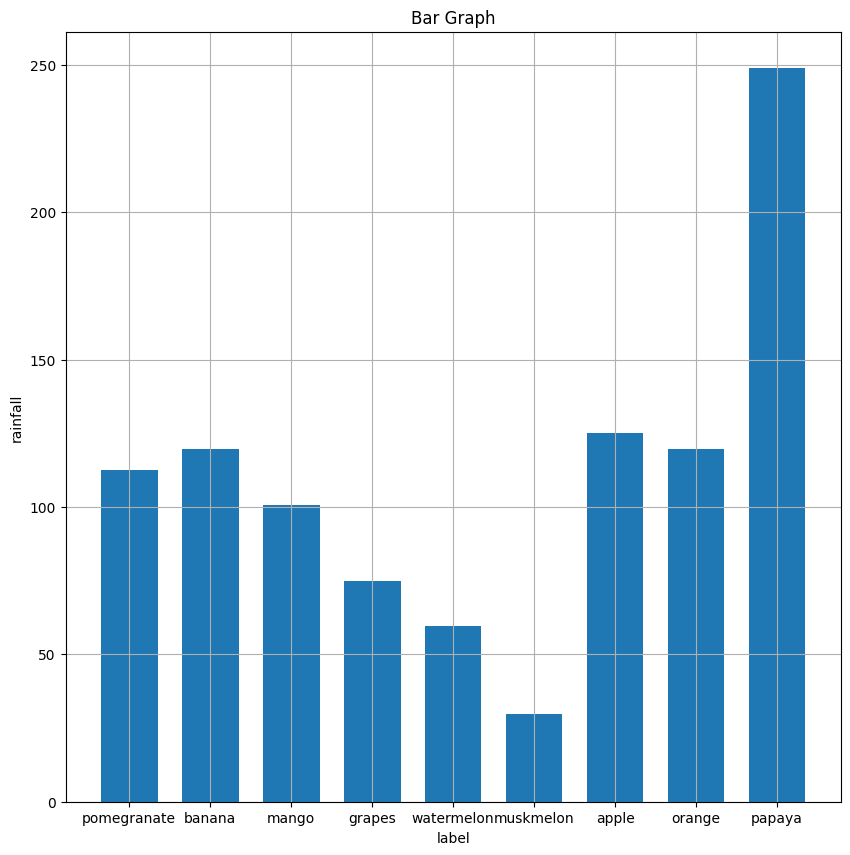

In [63]:
fig = plt.figure(figsize=(10,10))
plt.xlabel("label")
plt.ylabel("rainfall")
plt.grid(True)
plt.title("Bar Graph")
plt.bar(x,y,width=0.7)
plt.show()


In [64]:
a=df["rainfall"]
b=df["humidity"]

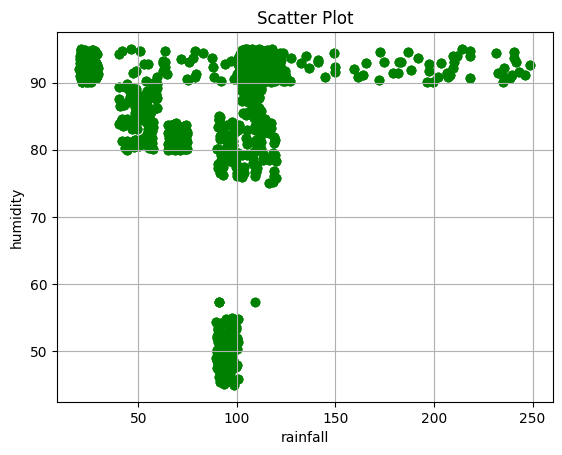

In [66]:
plt.xlabel("rainfall")
plt.ylabel("humidity")
plt.grid(True)
plt.title("Scatter Plot")
plt.scatter(a,b,color="green")

<Axes: title={'center': 'Histogram'}, xlabel='temperature', ylabel='Frequency'>

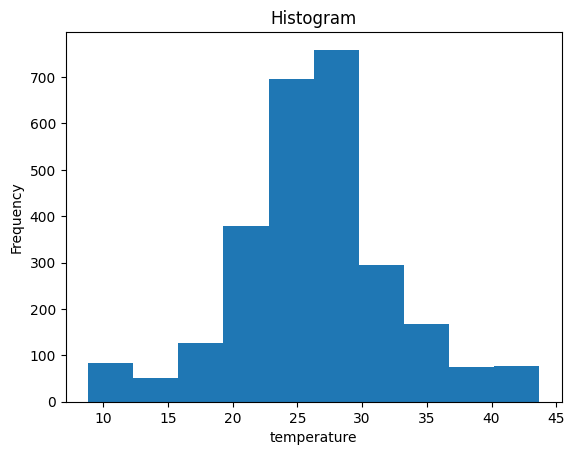

In [68]:
plt.xlabel("temperature")
plt.grid(True)
plt.title("Histogram")
df["temperature"].plot(kind="hist")

/tmp/ipykernel_26669/1848315425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["rainfall"])


<Axes: xlabel='rainfall', ylabel='Density'>

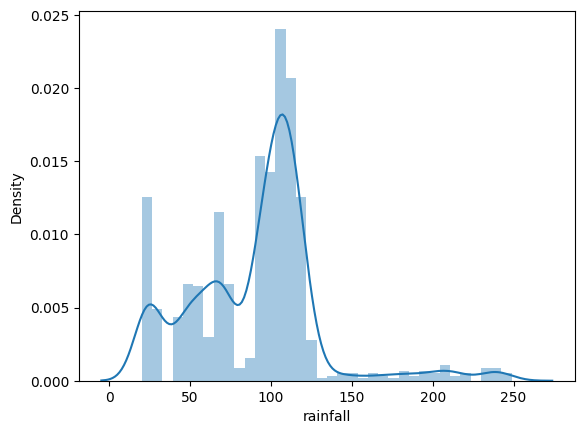

In [73]:
sns.distplot(df["rainfall"])

(array([ 339.,  345.,  303., 1133.,  432.,   24.,   24.,   33.,   36.,
          39.]),
 array([ 20.21126747,  43.07607058,  65.9408737 ,  88.80567681,
        111.67047992, 134.53528303, 157.40008615, 180.26488926,
        203.12969237, 225.99449549, 248.8592986 ]),
 <BarContainer object of 10 artists>)

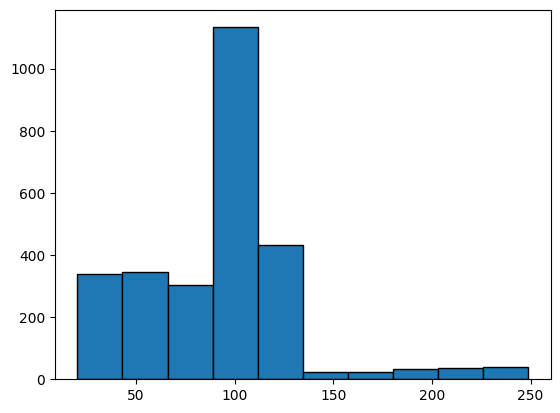

In [71]:
x=df["rainfall"]
plt.hist(x,edgecolor="black")

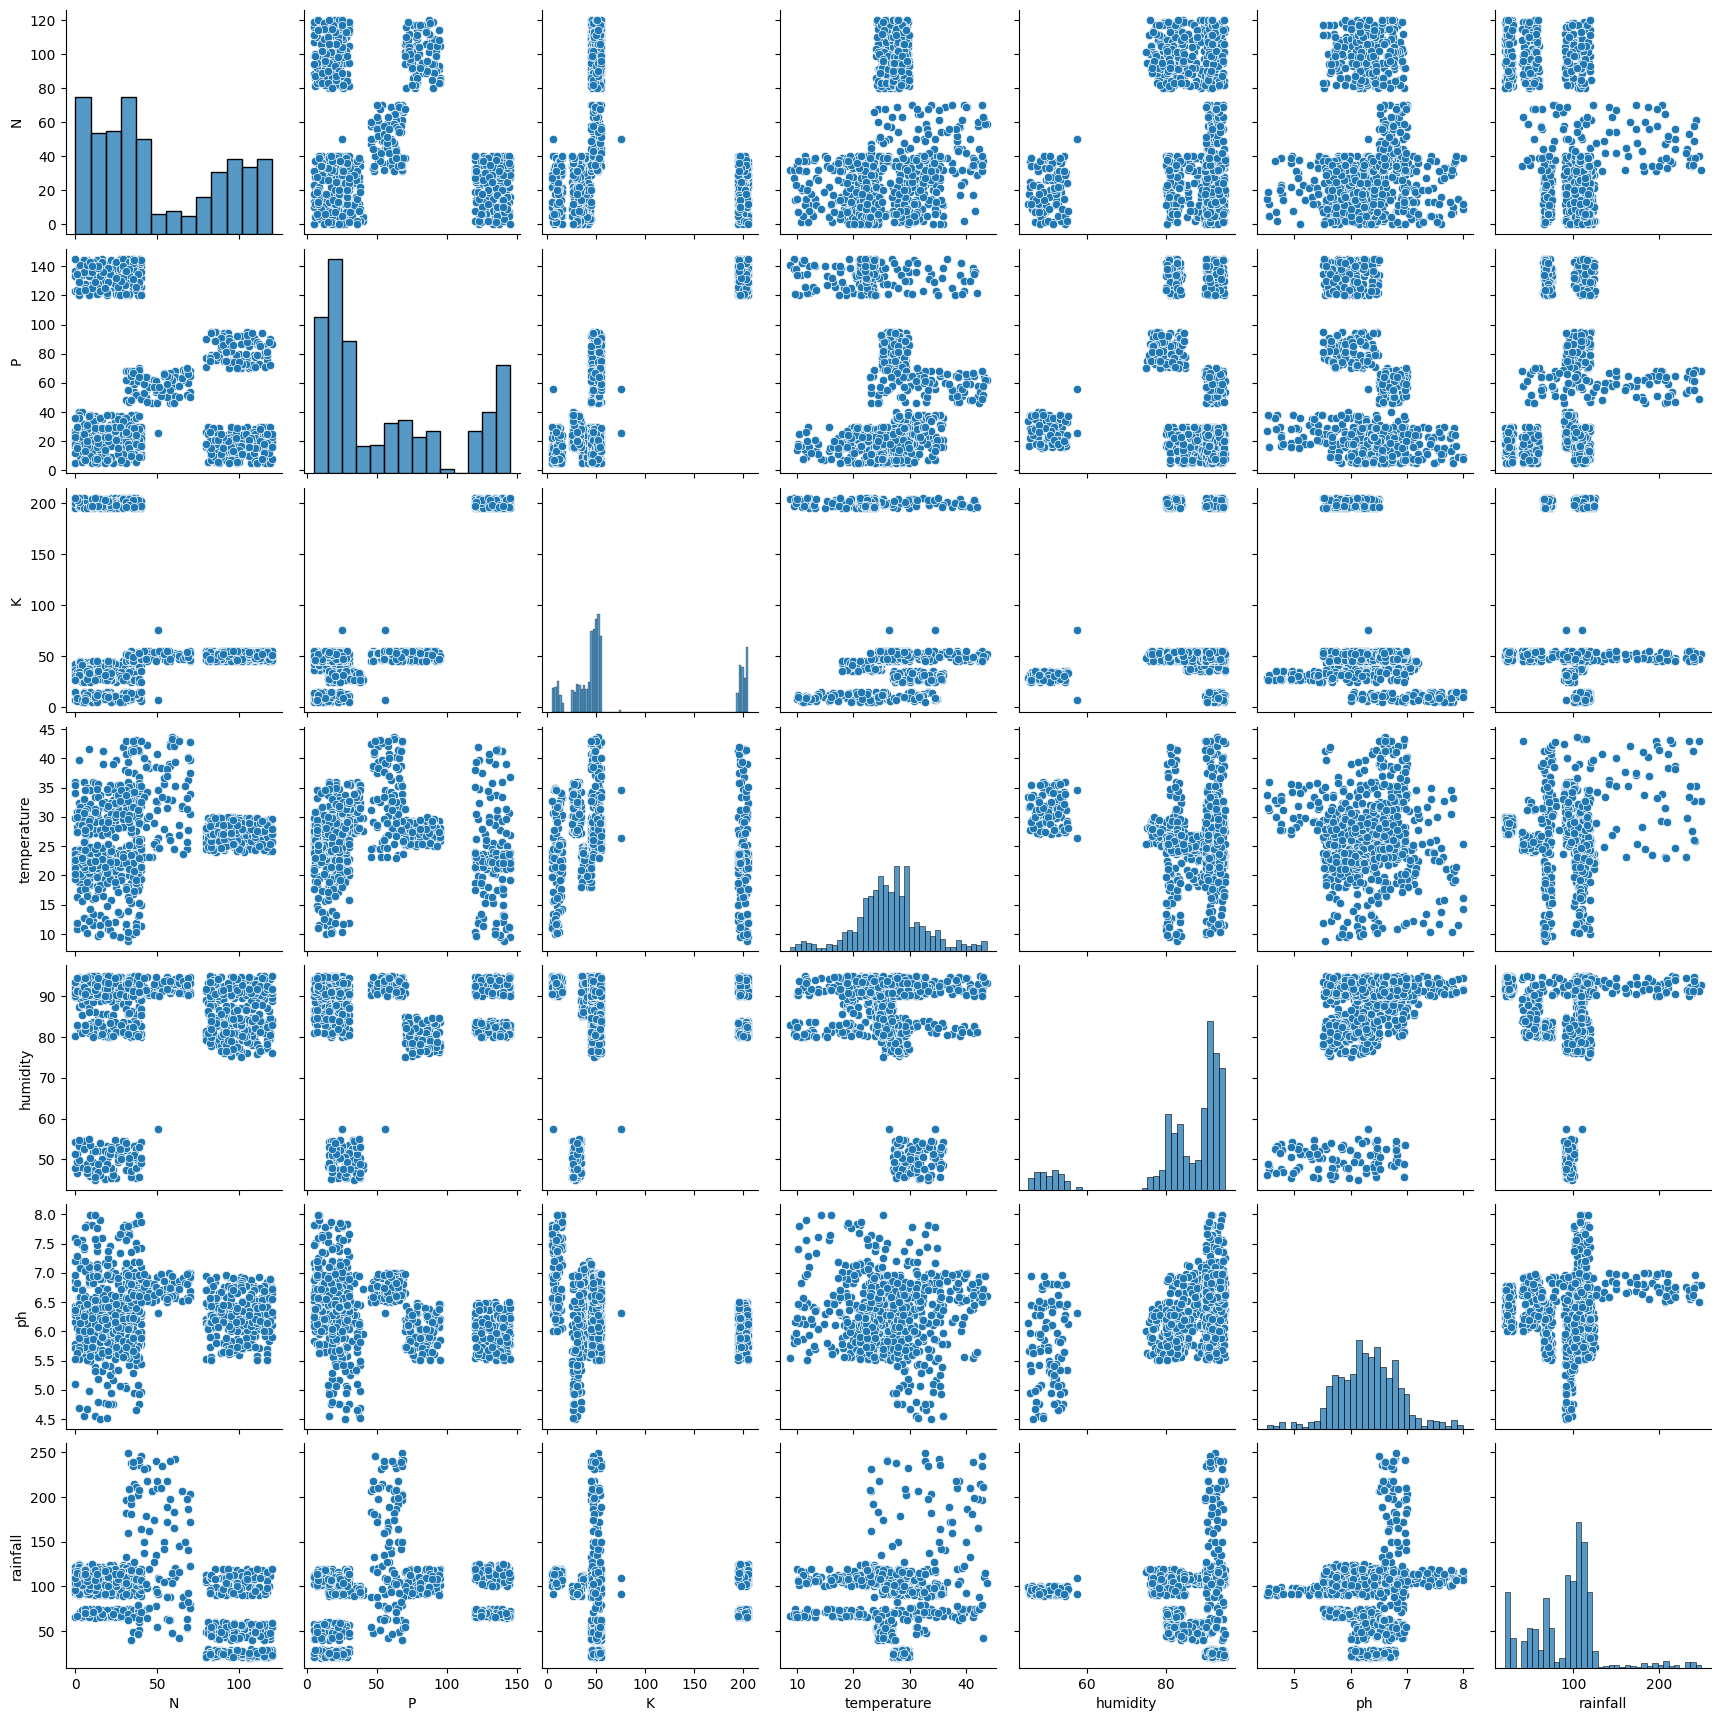

In [74]:
#categorical plot
import seaborn as sns
sns.pairplot(df)

Text(0.5, 1.0, 'graph showing the average rainfall for each label')

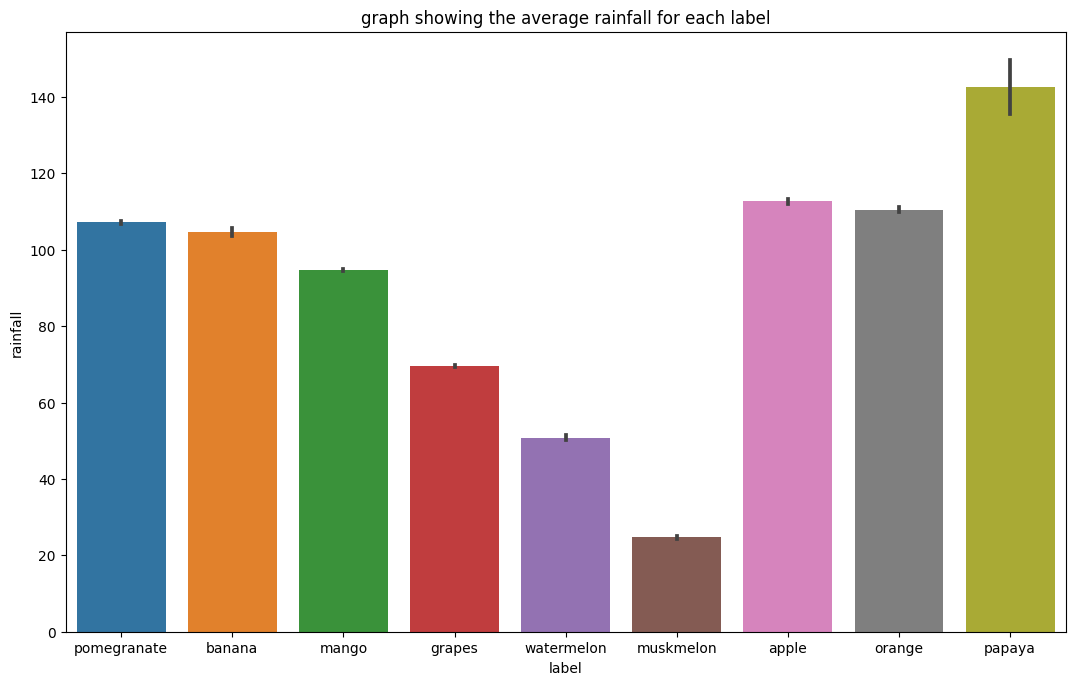

In [75]:
#bargraph
#bargraph is used to find the mean of the values
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
sns.barplot(x="label",y="rainfall",data=df)
plt.title("graph showing the average rainfall for each label")

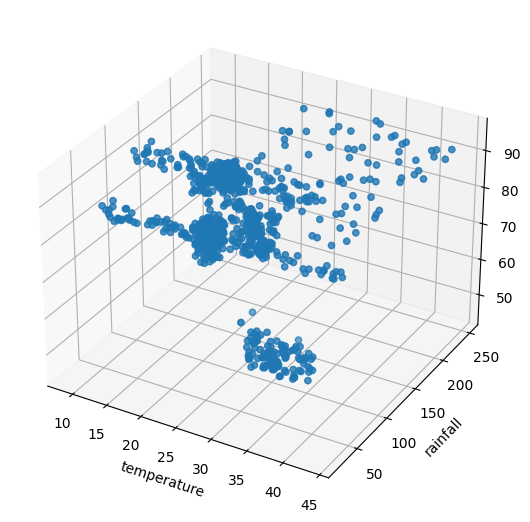

In [76]:
#plotting 3d graph
#this graph shows the relation between the rainfall,humidity,temperature.
data = df.sort_values(["temperature"])
x,y,z=data["temperature"],data["rainfall"],data["humidity"]
fig=plt.figure(figsize=(5,6))
ax2=fig.add_axes([0,0,1,1],projection="3d")
ax2.scatter3D(x,y,z,alpha=0.4)
ax2.set_xlabel("temperature")
ax2.set_ylabel("rainfall")
ax2.set_zlabel("humidity")
plt.show()
ax2.view_init(0,40)#by using this functions we can change view angle.

In [77]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

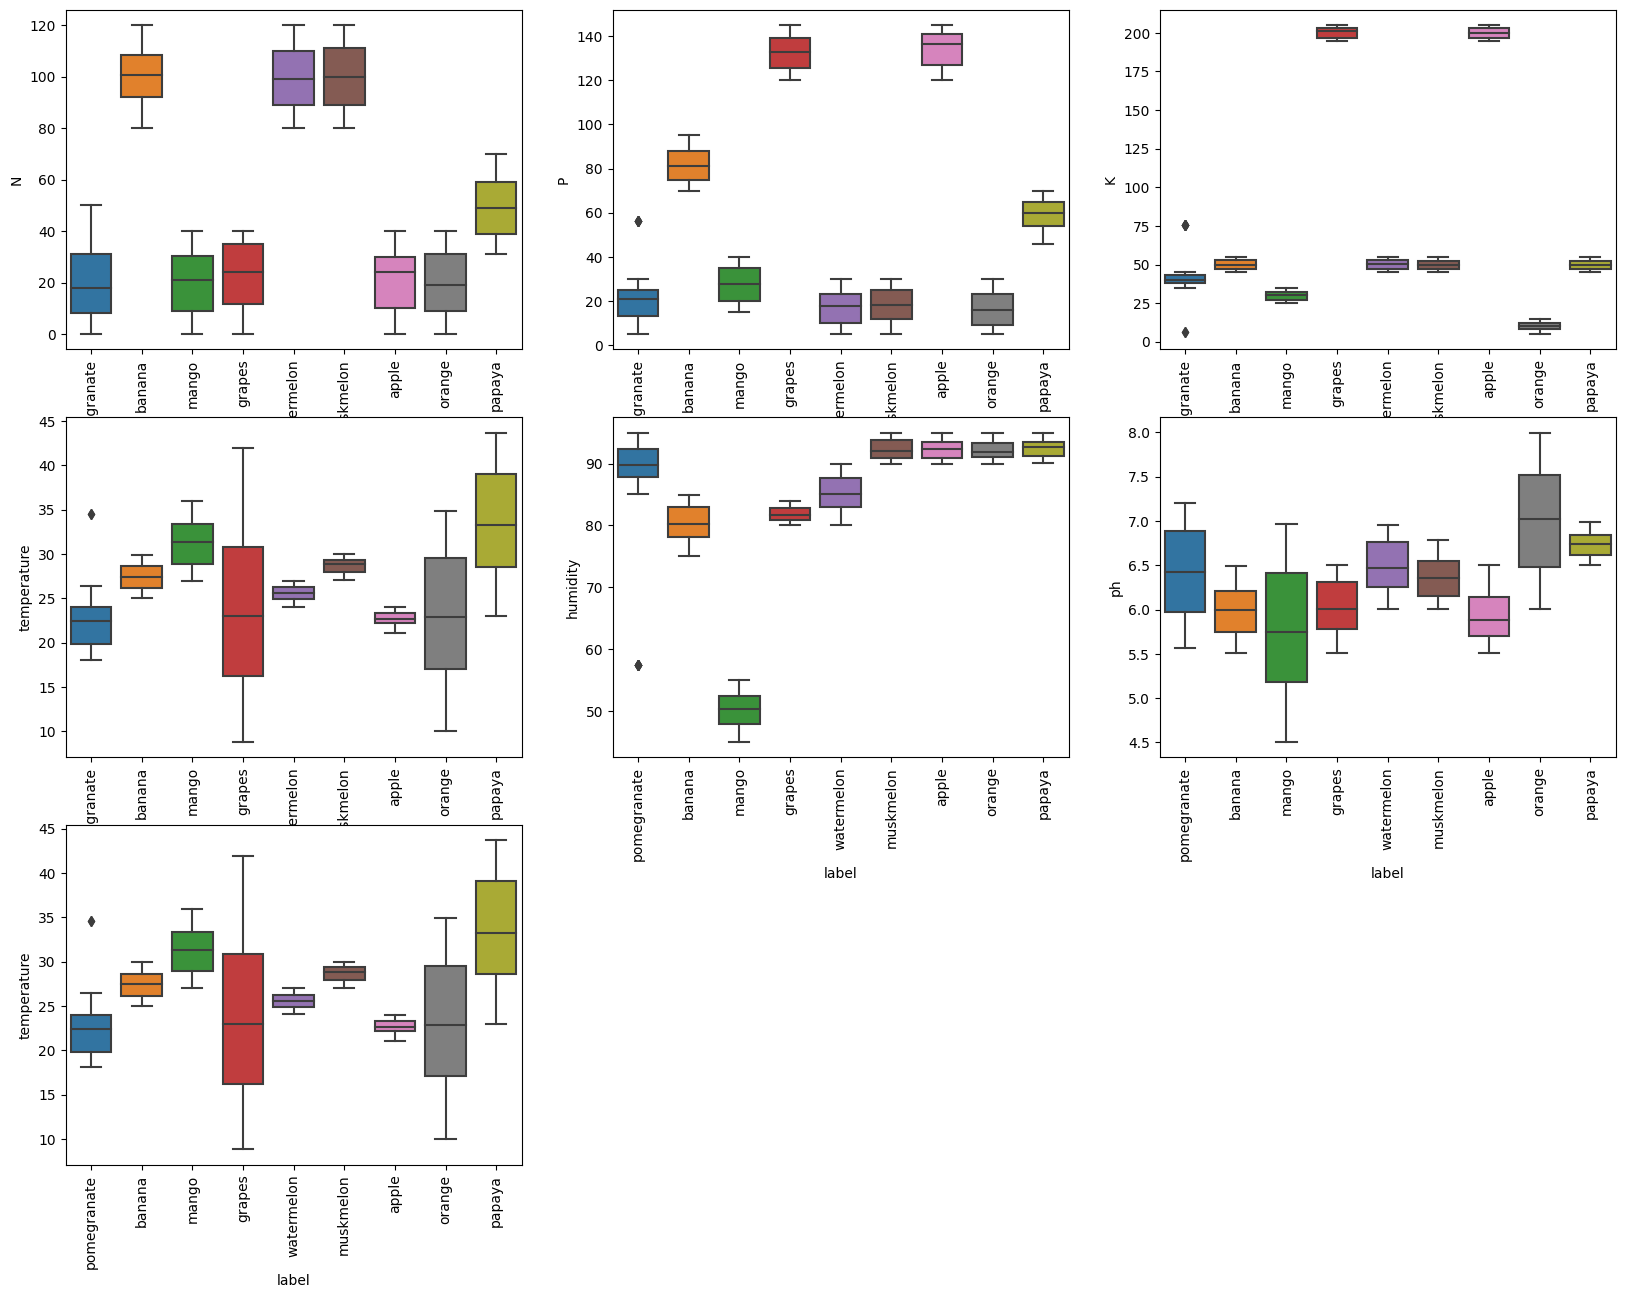

In [78]:
#observing the outliers
fig = plt.figure(figsize=(20,15))
ax=fig.subplots(3,3)
sns.boxplot(x="label",y="N",data=df,ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.boxplot(x="label",y="P",data=df,ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.boxplot(x="label",y="K",data=df,ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.boxplot(x="label",y="temperature",data=df,ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.boxplot(x="label",y="humidity",data=df,ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.boxplot(x="label",y="ph",data=df,ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

sns.boxplot(x="label",y="temperature",data=df,ax=ax[2,0])
ax[2,0].set_xticklabels(ax[2,0].get_xticklabels(), rotation=90)

plt.delaxes(ax[2,1])
plt.delaxes(ax[2,2])
plt.show()

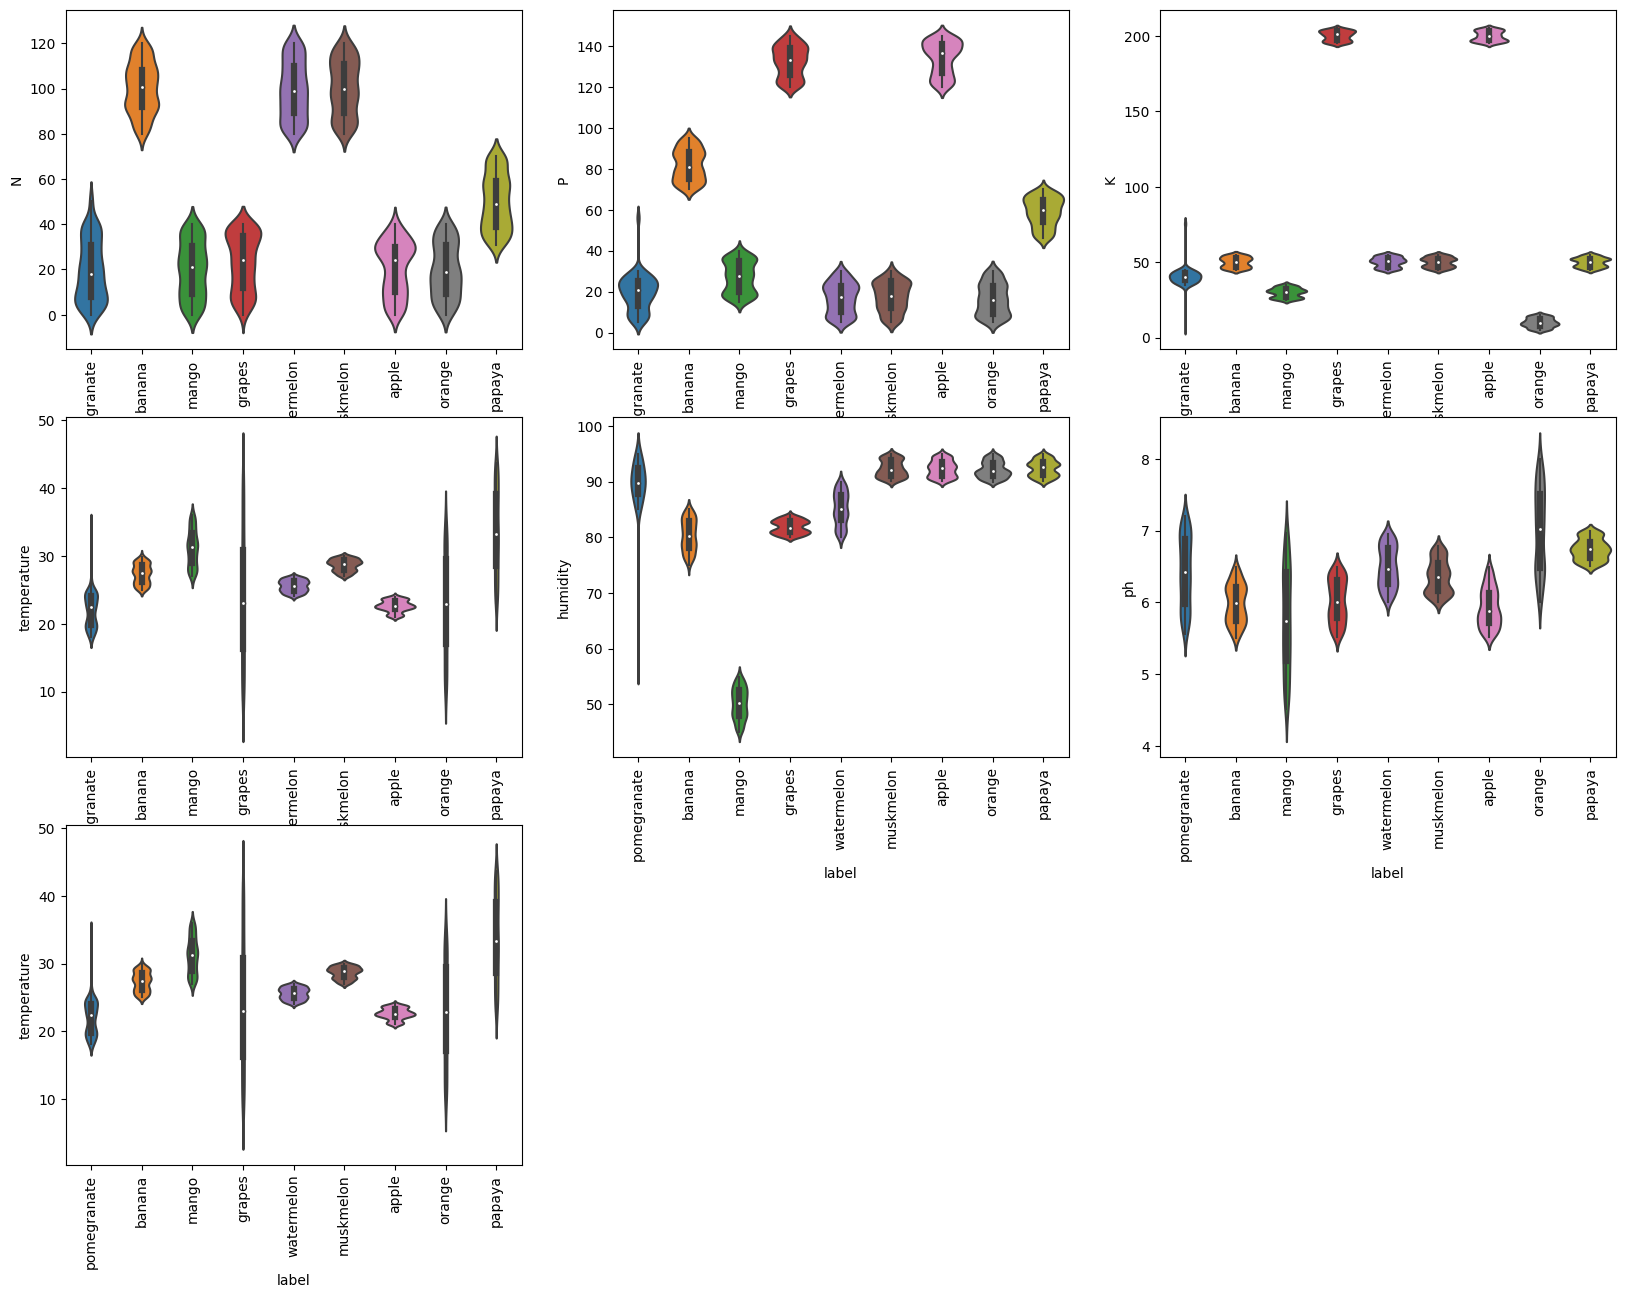

In [79]:
#observing the distributon of graphs using violinplot
#observing the outliers
fig = plt.figure(figsize=(20,15))
ax=fig.subplots(3,3)
sns.violinplot(x="label",y="N",data=df,ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.violinplot(x="label",y="P",data=df,ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.violinplot(x="label",y="K",data=df,ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.violinplot(x="label",y="temperature",data=df,ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.violinplot(x="label",y="humidity",data=df,ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.violinplot(x="label",y="ph",data=df,ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

sns.violinplot(x="label",y="temperature",data=df,ax=ax[2,0])
ax[2,0].set_xticklabels(ax[2,0].get_xticklabels(), rotation=90)

plt.delaxes(ax[2,1])
plt.delaxes(ax[2,2])
plt.show()

In [80]:
#pie chart showing average rainfall for each crop
data=df.groupby("label")["rainfall"].mean()
data=data.to_frame()

In [81]:
data.reset_index(inplace=True)

In [82]:
data.count()

label       9
rainfall    9
dtype: int64

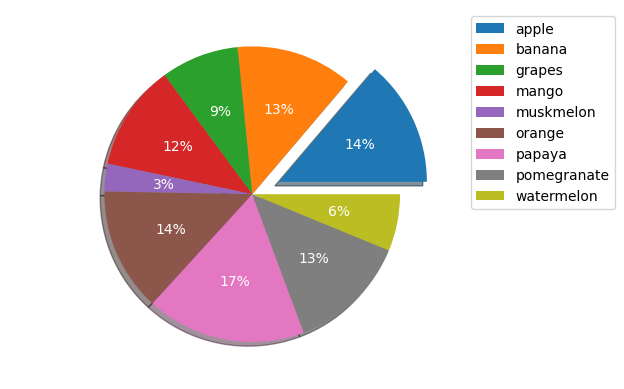

In [83]:
explode=[0]*9
explode[0]=0.2
plt.pie(data["rainfall"],shadow=True,explode=explode,labels=data["label"],autopct="%1.0f%%",textprops={"color":"white"})
plt.legend(bbox_to_anchor=[1,0,0.5,1])
plt.show()

In [35]:
#using SVM algorithm
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [36]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.997539975399754


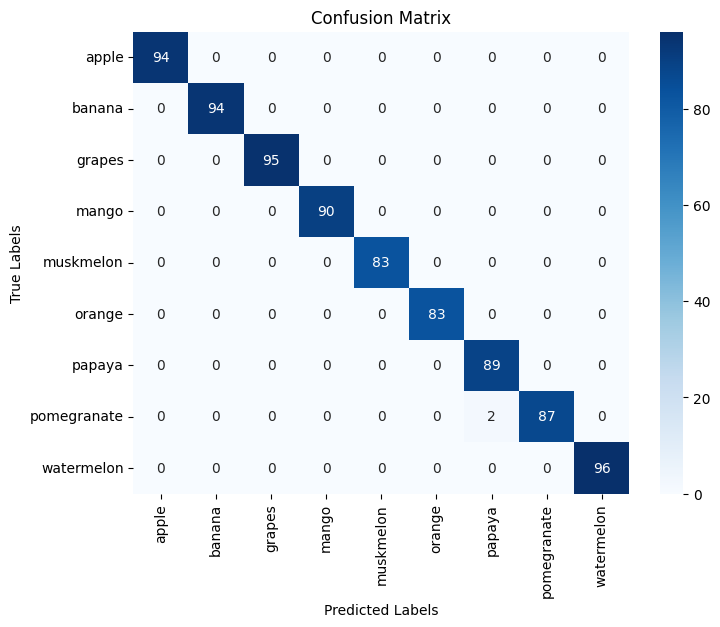

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [39]:
#using KNN algorithm
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
k = 19 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=19)

In [40]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.997539975399754


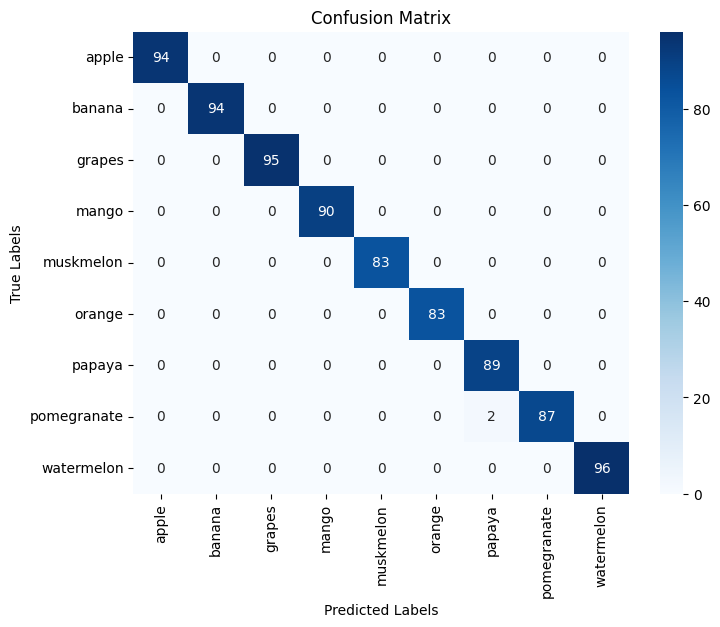

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [43]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.997539975399754


In [47]:
 new_data = {
    'N': 50,  
    'P': 30,  
    'K': 20, 
    'temperature': 28,  
    'humidity': 70,  
    'ph': 6.5,  
    'rainfall': 100  
  }
new_input = pd.DataFrame(new_data, index=[0])
  

In [45]:
predicted_label = svm.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: mango


In [48]:
predicted_label = svm.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: mango


In [49]:
 new_data = {
    'N': 45,  
    'P': 47,  
    'K': 55, 
    'temperature': 38,  
    'humidity': 91,  
    'ph': 6.7,  
    'rainfall': 119  
  }
new_input = pd.DataFrame(new_data, index=[0])
  

In [50]:
predicted_label = svm.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: papaya


In [51]:
predicted_label = svm.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: papaya


In [52]:
 new_data = {
    'N': 23,  
    'P': 24,  
    'K': 38, 
    'temperature': 24,  
    'humidity': 91,  
    'ph': 5.9,  
    'rainfall': 111  
  }
new_input = pd.DataFrame(new_data, index=[0])
  

In [53]:
predicted_label = svm.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: pomegranate


In [54]:
predicted_label = svm.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: pomegranate


In [56]:
 new_data = {
    'N': 75,  
    'P': 69,  
    'K': 47, 
    'temperature': 25,  
    'humidity': 80,  
    'ph': 6.3,  
    'rainfall': 100  
  }
new_input = pd.DataFrame(new_data, index=[0])
  

In [57]:
predicted_label = knn.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: banana


In [58]:
predicted_label = svm.predict(new_input)
print("Predicted label:", predicted_label[0])


Predicted label: banana
